In [135]:
import sys
print(sys.version)

3.5.5 | packaged by conda-forge | (default, Apr  6 2018, 16:03:44) [MSC v.1900 64 bit (AMD64)]


In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def BGR2RGB(image_BGR):
    image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
    
    return image_RGB

In [77]:
def plot_image(image):
    plt.figure(figsize = (8, 8))
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [78]:
def plot_rgb_histograms(image):
    colours = ('r','g','b')
    for i, colour in enumerate(colours):
        histogram = cv2.calcHist([image], [i], None, [256], [0,256])
        plt.plot(histogram, color=colour)
        plt.xlim([0,256])
        plt.show()

In [143]:
def get_lightness(image, threshold=128):
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    
    red_above_threshold = np.sum(red >= threshold)
    green_above_threshold = np.sum(green >= threshold)
    blue_above_threshold = np.sum(blue >= threshold)

    size = image.shape[0] * image.shape[1]
    
    red_above_threshold_pct = int(red_above_threshold / size  * 100)
    green_above_threshold_pct = int(green_above_threshold / size * 100)
    blue_above_threshold_pct = int(blue_above_threshold / size * 100)
    
    lightness = (red_above_threshold_pct + green_above_threshold_pct + blue_above_threshold_pct) / 3

    return {'red':red_above_threshold_pct, 'green':green_above_threshold_pct, 'blue':blue_above_threshold_pct}, lightness

In [141]:
frame_1639 = BGR2RGB(cv2.imread('BICPB1-20160417-1.MP4_frame_1639.jpg'))
frame_7250 = BGR2RGB(cv2.imread('BIH2B3-20161010-2.MP4_frame_7250.jpg'))
frame_8220 = BGR2RGB(cv2.imread('BIH2B3-20161010-2.MP4_frame_8220.jpg'))
frame_1639_light = BGR2RGB(cv2.imread('BICPB1-20160417-1.MP4_frame_1639_Light.jpg'))

images = [frame_1639, frame_7250, frame_8220, frame_1639_light]

Dark green
red: 0%
green: 30%
blue: 0%


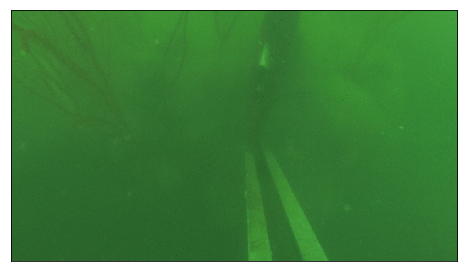

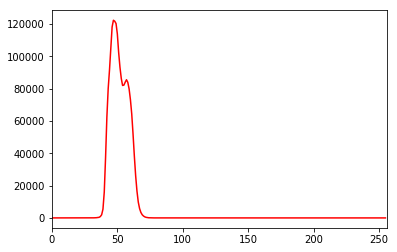

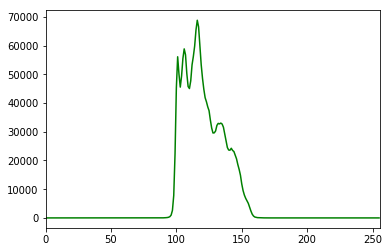

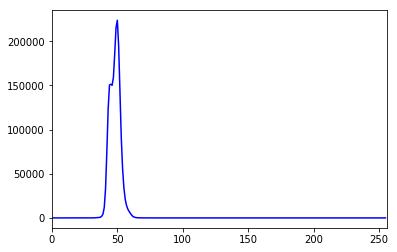

Medium green
red: 0%
green: 93%
blue: 3%


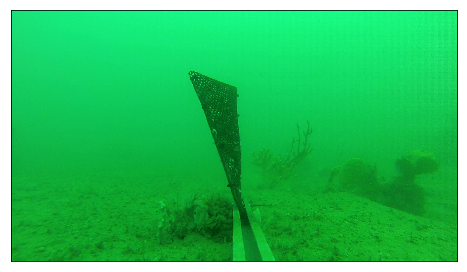

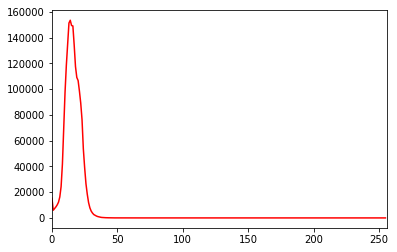

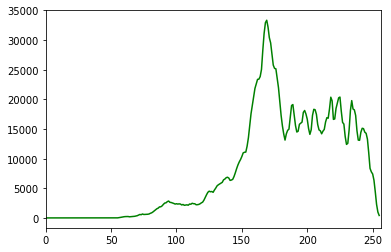

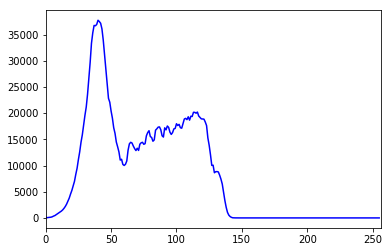

Medium green
red: 5%
green: 93%
blue: 0%


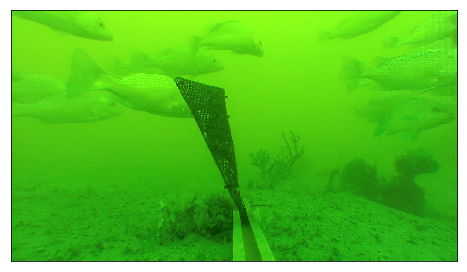

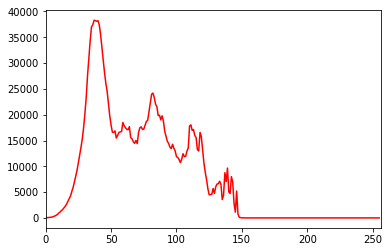

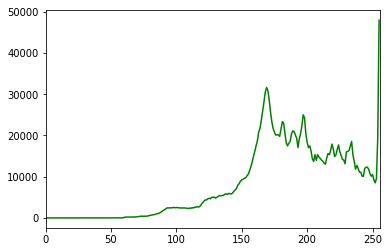

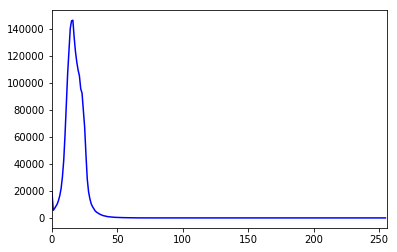

Light green
red: 98%
green: 99%
blue: 97%


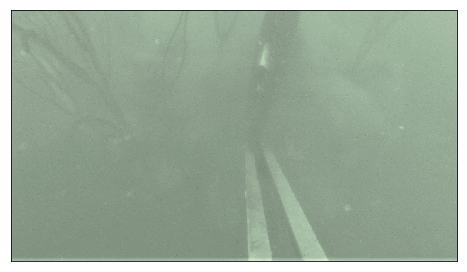

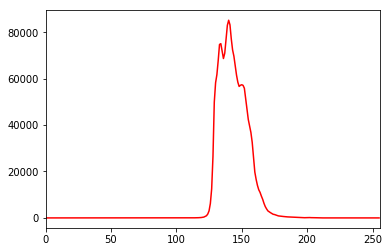

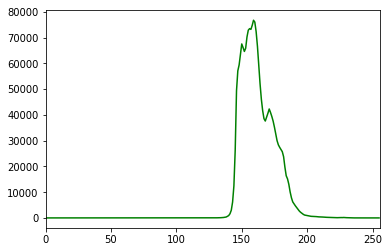

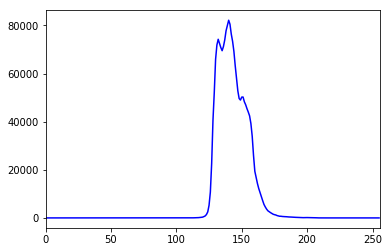

In [148]:
for image in images:
    pcts, lightness = get_lightness(image)
    
    dominant_color = sorted(pcts, key=pcts.get, reverse=True)[0]

    lightness_description = ''
    
    if lightness <= 25:
        lightness_description = 'Dark'
    elif lightness <= 50:
        lightness_description = 'Medium'
    elif lightness <= 75:
        lightness_description = 'Medium Light'
    else:
        lightness_description = 'Light'
    
    print('{0} {1}'.format(lightness_description, dominant_color))
    print('red: {0}%'.format(pcts['red']))
    print('green: {0}%'.format(pcts['green']))
    print('blue: {0}%'.format(pcts['blue']))
    
    plot_image(image)
    plot_rgb_histograms(image)